# 1. Language Processing and Python

It is easy to get our hands on millions of words of text. What can we do with it, assuming we can write some simple programs? In this chapter we'll address the following questions:

1. What can we achieve by combining simple programming techniques with large quantities of text?
2. How can we automatically extract key words and phrases that sum up the style and content of a text?
3. What tools and techniques does the Python programming language provide for such work?
4. What are some of the interesting challenges of natural language processing?



## 1 Computing with Language: Texts and Words

We're all very familiar with text, since we read and write it every day. Here we will treat text as *raw data* for the programs we write, programs that manipulate and analyze it in a variety of interesting ways.

### 1.1 Getting Started with Python

Now, let's begin by using Python as a calculator:

In [ ]:
1 + 5 * 2 - 3

Now let's try a nonsensical expression to see how the interpreter handles it (remove the comment character):

In [ ]:
#1 +

This produced a **syntax error**. In Python, it doesn't make sense to end an instruction with a plus sign. The Python interpreter indicates the line where the problem occurred.

### 1.2   Getting Started with NLTK

The first step is to type a special command which tells the interpreter to load some texts for us to explore: `from nltk.book import *`. This says "from NLTK's `book` module, load all items." The `book` module contains all the data you will need as you read this chapter.

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Any time we want to find out about these texts, we just have to enter their names:

In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

Now that we can use the Python interpreter, and have some data to work with, we're ready to get started.

### 1.3   Searching Text

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word *monstrous* in *Moby Dick* by entering `text1` followed by a period, then the term `concordance`, and then placing `"monstrous"` in parentheses:

In [4]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


The first time you use a concordance on a particular text, it takes a few extra seconds to build an index so that subsequent searches are fast.

A concordance permits us to see words in context. For example, we saw that *monstrous* occurred in contexts such as *the ___ pictures* and *a ___ size* . What other words appear in a similar range of contexts? We can find out by appending the term `similar` to the name of the text in question, then inserting the relevant word in parentheses:

In [5]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [6]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, *monstrous* has positive connotations, and sometimes functions as an intensifier like the word *very*.

The term `common_contexts` allows us to examine just the contexts that are shared by two or more words, such as *monstrous* and *very*. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:


In [8]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the *location* of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a **dispersion plot**. Each stripe represents an instance of a word, and each row represents the entire text. We see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end).

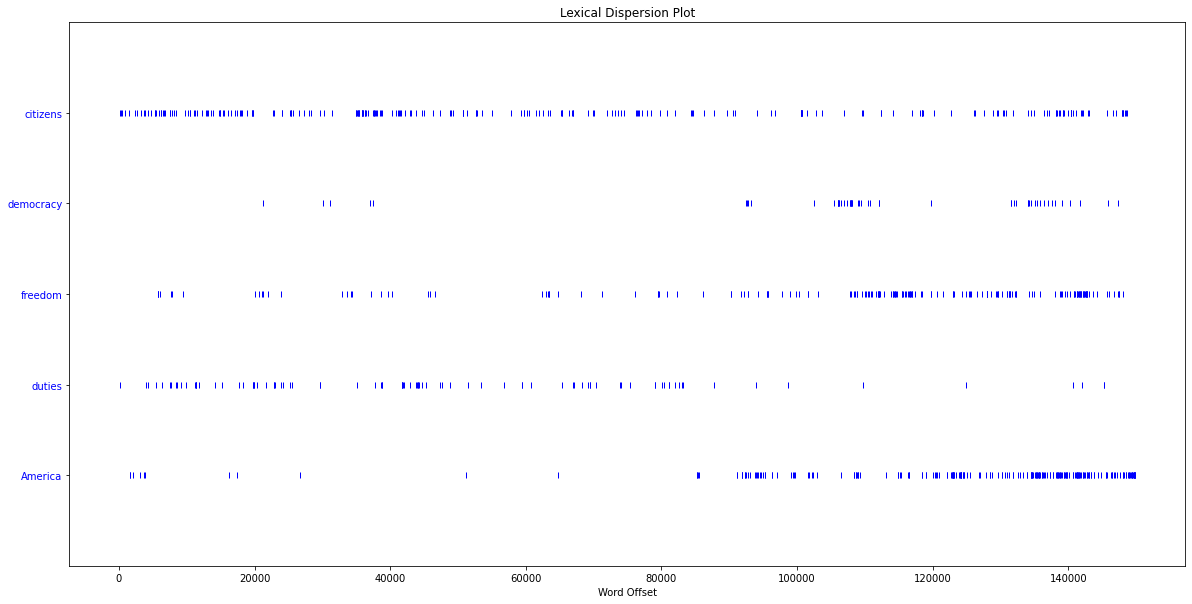

In [9]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [20,10]
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term `generate`. (We need to include the parentheses, but there's nothing that goes between them.)

In [10]:
text3.generate()

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

### 1.4 Counting Vocabulary

The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term `len` to get the length of something, which we'll apply here to the book of Genesis:

In [11]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or "tokens." A **token** is the technical name for a sequence of characters — such as `hairy`, `his`, or `:)` — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase *to be or not to be*, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of *to*, two of *be*, and one each of *or* and *not*. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. In Python we can obtain the vocabulary items of `text3` with the command: `set(text3)`. When you do this, many screens of words will fly past. Now try the following:

In [12]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [13]:
len(set(text3))

2789

By wrapping `sorted()` around the Python expression `set(text3)`, we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with *A*. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use `len` to obtain this number. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types". A **word type** is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items **types** instead of word types.

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average.

In [14]:
len(set(text3)) / len(text3)

0.06230453042623537

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [15]:
text3.count('smote')

5

In [16]:
100 * text4.count('a') / len(text4)

1.457973123627309

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. Now you only have to type a short name instead of one or more complete lines of Python code, and you can re-use it as often as you like. The block of code that does a task for us is called a **function**, and we define a short name for our function with the keyword `def`. The next example shows how to define two new functions, `lexical_diversity()` and `percentage()`:

In [17]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In the definition of `lexical_diversity()`, we specify a **parameter** named `text` . This parameter is a "placeholder" for the actual text whose lexical diversity we want to compute, and reoccurs in the block of code that will run when the function is used. Similarly, `percentage()` is defined to take two parameters, named `count` and `total`.

Once Python knows that `lexical_diversity()` and `percentage()` are the names for specific blocks of code, we can go ahead and use these functions:

In [ ]:
lexical_diversity(text3)

In [ ]:
lexical_diversity(text5)

In [ ]:
percentage(4, 5)

In [ ]:
percentage(text4.count('a'), len(text4))

To recap, we use or **call** a function such as `lexical_diversity()` by typing its name, followed by an open parenthesis, the name of the text, and then a close parenthesis. These parentheses will show up often; their role is to separate the name of a task — such as `lexical_diversity()` — from the data that the task is to be performed on — such as `text3`. The data value that we place in the parentheses when we call a function is an **argument** to the function.

You have already encountered several functions in this chapter, such as `len()`, `set()`, and `sorted()`. By convention, we will always add an empty pair of parentheses after a function name, as in `len()`, just to make clear that what we are talking about is a function rather than some other kind of Python expression. Functions are an important concept in programming, and we only mention them at the outset to give newcomers a sense of the power and creativity of programming. Don't worry if you find it a bit confusing right now.

Later we'll see how to use functions when tabulating data. Each row of the table will involve the same computation but with different data, and we'll do this repetitive work using a function.

*Lexical Diversity of Various Genres in the Brown Corpus*

| Genre | Tokens | Types | Lexical diversity |
| :--   |--------|-------|-------------------|
| skill and hobbies | 82345 | 11935 | 0.145 |
|humor|21695 |	5017 |	0.231 |
|fiction: science |	14470 |	3233 |	0.223 |
|press: reportage |	100554 | 14394 |	0.143 |
|fiction: romance |	70022 |	8452 |	0.121 |
|religion |	39399 |	6373 |	0.162 |

## 2   A Closer Look at Python: Texts as Lists of Words

You've seen some important elements of the Python programming language. Let's take a few moments to review them systematically.

### 2.1   Lists

What is a text? At one level, it is a sequence of symbols on a page such as this one. At another level, it is a sequence of chapters, made up of a sequence of sections, where each section is a sequence of paragraphs, and so on. However, for our purposes, we will think of a text as nothing more than a sequence of words and punctuation. Here's how we represent text in Python, in this case the opening sentence of *Moby Dick*:

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']

After the prompt we've given a name we made up, `sent1`, followed by the equals sign, and then some quoted words, separated with commas, and surrounded with brackets. This bracketed material is known as a **list** in Python: it is how we store a text. We can inspect it by typing the name. We can ask for its length. We can even apply our own `lexical_diversity()` function to it.

In [ ]:
sent1

In [ ]:
len(sent1)

In [ ]:
lexical_diversity(sent1)

Some more lists have been defined for you, one for the opening sentence of each of our texts, `sent2 … sent9`. We inspect two of them here; you can see the rest for yourself using the Python interpreter.

In [ ]:
sent2

In [ ]:
sent3

A pleasant surprise is that we can use Python's addition operator on lists. Adding two lists creates a new list with everything from the first list, followed by everything from the second list:

In [ ]:
['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail']

We don't have to literally type the lists either; we can use short names that refer to pre-defined lists.

In [ ]:
sent4 + sent1

What if we want to add a single item to a list? This is known as **appending**. When we `append()` to a list, the list itself is updated as a result of the operation.


In [ ]:
sent1.append('Some')
sent1

### 2.2   Indexing Lists

As we have seen, a text in Python is a list of words, represented using a combination of brackets and quotes. Just as with an ordinary page of text, we can count up the total number of words in `text1` with `len(text1)`, and count the occurrences in a text of a particular word — say, `'heaven'` — using `text1.count('heaven')`.

With some patience, we can pick out the 1st, 173rd, or even 14,278th word in a printed text. Analogously, we can identify the elements of a Python list by their order of occurrence in the list. The number that represents this position is the item's **index**. We instruct Python to show us the item that occurs at an index such as `173` in a text by writing the name of the text followed by the index inside square brackets:

In [36]:
text4[173]

'awaken'

We can do the converse; given a word, find the index of when it first occurs:

In [37]:
text4.index('awaken')

173

Indexes are a common way to access the words of a text, or, more generally, the elements of any list. Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as **slicing**.

In [ ]:
text5[16715:16735]

In [ ]:
text6[1600:1625]

Indexes have some subtleties, and we'll explore these with the help of an artificial sentence:

In [ ]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5',
        'word6', 'word7', 'word8', 'word9', 'word10']
sent[0]

In [ ]:
sent[9]

Notice that our indexes start from zero: `sent` element zero, written `sent[0]`, is the first word, `'word1'`, whereas `sent` element 9 is `'word10'`. The reason is simple: the moment Python accesses the content of a list from the computer's memory, it is already at the first element; we have to tell it how many elements forward to go. Thus, zero steps forward leaves it at the first element.

Now, if we accidentally use an index that is too large, we get an error:

In [ ]:
#sent[10]

This time it is not a syntax error, because the program fragment is syntactically correct. Instead, it is a **runtime error**, and it produces a `Traceback` message that shows the context of the error, followed by the name of the error, `IndexError`, and a brief explanation.

Let's take a closer look at slicing, using our artificial sentence again. Here we verify that the slice `5:8` includes `sent` elements at indexes 5, 6, and 7:

In [ ]:
sent[5:8]

In [ ]:
sent[5]

In [ ]:
sent[6]

In [ ]:
sent[7]

By convention, `m:n` means elements *m…n-1*. As the next example shows, we can omit the first number if the slice begins at the start of the list, and we can omit the second number if the slice goes to the end:

In [ ]:
sent[:3]

In [ ]:
text2[141525:]

We can modify an element of a list by assigning to one of its index values. In the next example, we put `sent[0]` on the left of the equals sign. We can also replace an entire slice with new material. A consequence of this last change is that the list only has four elements, and accessing a later value generates an error.

In [ ]:
sent[0] = 'First'
sent[9] = 'Last'
len(sent)

In [ ]:
sent[1:9] = ['Second', 'Third']
sent

In [ ]:
#sent[9]

### 2.3   Variables

From the start, you have had access to texts called `text1`, `text2`, and so on. It saved a lot of typing to be able to refer to a 250,000-word book with a short name like this! In general, we can make up names for anything we care to calculate. We did this ourselves in the previous sections, e.g., defining a **variable** `sent1`, as follows:

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']

Such lines have the form: *variable = expression*. Python will evaluate the expression, and save its result to the variable. This process is called **assignment**. It does not generate any output; you have to type the variable on a line of its own to inspect its contents. The equals sign is slightly misleading, since information is moving from the right side to the left. It might help to think of it as a left-arrow. The name of the variable can be anything you like, e.g., `my_sent`, `sentence`, `xyzzy`. It must start with a letter, and can include numbers and underscores. Here are some examples of variables and assignments:

In [ ]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode',
           'forth', 'from', 'Camelot', '.']
noun_phrase = my_sent[1:4]
noun_phrase

In [ ]:
wOrDs = sorted(noun_phrase)
wOrDs

Remember that capitalized words appear before lowercase words in sorted lists.

It is good to choose meaningful variable names to remind you — and to help anyone else who reads your Python code — what your code is meant to do. Python does not try to make sense of the names; it blindly follows your instructions, and does not object if you do something confusing, such as `one = 'two'` or `two = 3`. The only restriction is that a variable name cannot be any of Python's reserved words, such as `def`, `if`, `not`, and `import`. If you use a reserved word, Python will produce a syntax error:

In [ ]:
#not = 'Camelot'

We will often use variables to hold intermediate steps of a computation, especially when this makes the code easier to follow. Thus `len(set(text1))` could also be written:

In [ ]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

### 2.4   Strings

Some of the methods we used to access the elements of a list also work with individual words, or **strings**. For example, we can assign a string to a variable, index a string, and slice a string:

In [ ]:
name = 'Monty'
name[0]

In [ ]:
name[:4]

We can also perform multiplication and addition with strings:

In [ ]:
name * 2

In [ ]:
name + '!'

We can join the words of a list to make a single string, or split a string into a list, as follows:

In [ ]:
' '.join(['Monty', 'Python'])

In [ ]:
'Monty Python'.split()

We will come back to the topic of strings later. For the time being, we have two important building blocks — lists and strings — and are ready to get back to some language analysis.

## 3   Computing with Language: Simple Statistics

Let's return to our exploration of the ways we can bring our computational resources to bear on large quantities of text. We began this discussion above, and saw how to search for words in context, how to compile the vocabulary of a text, how to generate random text in the same style, and so on.

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text. 

Before continuing further, you might like to check your understanding of the last section by predicting the output of the following code. 

In [22]:
saying = ['After', 'all', 'is', 'said', 'and', 'done',
          'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens[-2:]

['said', 'than']

### 3.1   Frequency Distributions

How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book. One method would be to keep a tally for each vocabulary item, like that shown below. The tally would need thousands of rows, and it would be an exceedingly laborious process — so laborious that we would rather assign the task to a machine.

<img src="images/tally.png" width="200"/>

*Counting Words Appearing in a Text (a frequency distribution)*

This table is known as a **frequency distribution**, and it tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a `FreqDist` to find the 50 most frequent words of *Moby Dick*:

In [23]:
fdist1 = FreqDist(text1)
print(fdist1)
fdist1.most_common(50)

<FreqDist with 19317 samples and 260819 outcomes>


[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [24]:
fdist1['whale']

906

When we first invoke `FreqDist`, we pass the name of the text as an argument. We can inspect the total number of words ("outcomes") that have been counted up — 260,819 in the case of *Moby Dick*. The expression `most_common(50)` gives us a list of the 50 most frequently occurring types in the text.

Do any words produced in the last example help us grasp the topic or genre of this text? Only one word, *whale*, is slightly informative! It occurs over 900 times. The rest of the words tell us nothing about the text; they're just English "plumbing." What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using `fdist1.plot(50, cumulative=True)`, to produce the graph below. These 50 words account for nearly half the book!

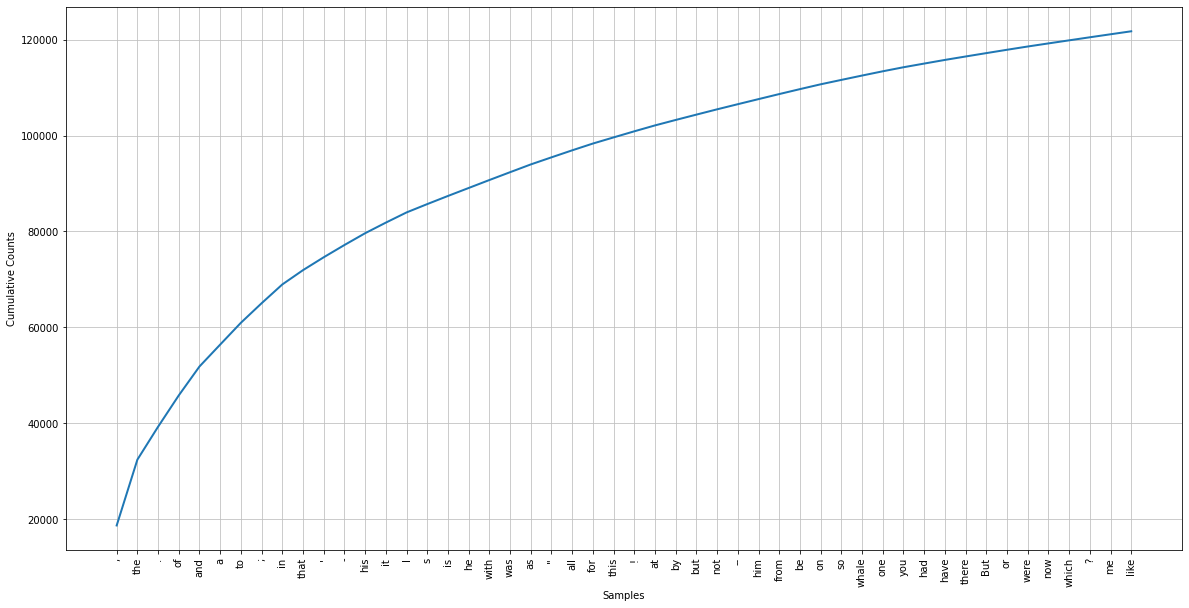

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [25]:
fdist1.plot(50, cumulative=True)

If the frequent words don't help us, how about the words that occur once only, the so-called **hapaxes**? View them by typing `fdist1.hapaxes()`. This list contains *lexicographer*, *cetological*, *contraband*, *expostulations*, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

In [26]:
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


### 3.2   Fine-grained Selection of Words

Next, let's look at the *long* words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property *P*, so that *P(w)* is true if and only if *w* is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in (1a). This means "the set of all *w* such that *w* is an element of *V* (the vocabulary) and *w* has property *P*".
		
(1a) {w | w ∈ V & P(w)}

(1b) `[w for w in V if p(w)]`

The corresponding Python expression is given in (1b). (Note that it produces a list, not a set, which means that duplicates are possible.) Observe how similar the two notations are. Let's go one more step and write executable Python code:

In [27]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

For each word *w* in the vocabulary *V*, we check whether `len(w)` is greater than 15; all other words will be ignored. We will discuss this syntax more carefully later.

Let's return to our task of finding words that characterize a text. Notice that the long words in `text4` reflect its national focus — *constitutionally*, *transcontinental* — whereas those in `text5` reflect its informal content: *boooooooooooglyyyyyy* and *yuuuuuuuuuuuummmmmmmmmmmm*. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find *frequently occurring* long words. This seems promising since it eliminates frequent short words (e.g., *the*) and infrequent long words (e.g. *antiphilosophists*). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [28]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: `len(w) > 7` ensures that the words are longer than seven letters, and `fdist5[w] > 7` ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece of code, processing tens of thousands of words, produces some informative output.

### 3.3   Collocations and Bigrams

A **collocation** is a sequence of words that occur together unusually often. Thus *red wine* is a collocation, whereas *the wine* is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, *maroon wine* sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as **bigrams**. This is easily accomplished with the function `bigrams()`:

In [29]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

Here we see that the pair of words *than-done* is a bigram, and we write it in Python as `('than', 'done')`. Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The `collocations()` function does this for us. We will see how it works later.

In [30]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; Old World; Almighty God; Fellow citizens; Chief
Magistrate; every citizen; one another; fellow Americans; Indian
tribes; public debt; foreign nations


In [ ]:
text8.collocations()

The collocations that emerge are very specific to the genre of the texts. In order to find *red wine* as a collocation, we would need to process a much larger body of text.

### 3.4   Counting Other Things

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a `FreqDist` out of a long list of numbers, where each number is the length of the corresponding word in the text:

In [31]:
 [len(w) for w in text1]

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [32]:
fdist = FreqDist(len(w) for w in text1)
print(fdist)
fdist

<FreqDist with 19 samples and 260819 outcomes>


FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

We start by deriving a list of the lengths of words in `text1`, and the `FreqDist` then counts the number of times each of these occurs. The result is a distribution containing a quarter of a million items, each of which is a number corresponding to a word token in the text. But there are at most only 20 distinct items being counted, the numbers 1 through 20, because there are only 20 different word lengths. I.e., there are words consisting of just one character, two characters, ..., twenty characters, but none with twenty one or more characters. One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:

In [33]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [34]:
fdist.max()

3

In [35]:
fdist.freq(3)

0.19255882431878046

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might help us understand differences between authors, genres, or languages.

The table below summarizes the functions defined in frequency distributions.

*Functions Defined for NLTK's Frequency Distributions*

| Example | Description |
| :- | :- |
|`fdist = FreqDist(samples)` 	|create a frequency distribution containing the given samples|
|`fdist[sample] += 1` 	|increment the count for this sample|
|`fdist['monstrous']` 	|count of the number of times a given sample occurred|
|`fdist.freq('monstrous')` 	|frequency of a given sample|
|`fdist.N()` 	|total number of samples|
|`fdist.most_common(n)` 	|the `n` most common samples and their frequencies|
|`for sample in fdist:` 	|iterate over the samples|
|`fdist.max()` 	|sample with the greatest count|
|`fdist.tabulate()` 	|tabulate the frequency distribution|
|`fdist.plot()` 	|graphical plot of the frequency distribution|
|`fdist.plot(cumulative=True)` 	|cumulative plot of the frequency distribution|
|`fdist1 \|= fdist2` 	|update `fdist1` with counts from `fdist2`|
|`fdist1 < fdist2` 	|test if samples in `fdist1` occur less frequently than in `fdist2`|

Our discussion of frequency distributions has introduced some important Python concepts, and we will look at them systematically in the next section.

## 4   Back to Python: Making Decisions and Taking Control

So far, our little programs have had some interesting qualities: the ability to work with language, and the potential to save human effort through automation. A key feature of programming is the ability of machines to make decisions on our behalf, executing instructions when certain conditions are met, or repeatedly looping through text data until some condition is satisfied. This feature is known as **control**, and is the focus of this section.

### 4.1   Conditionals

Python supports a wide range of operators, such as < and >=, for testing the relationship between values. The full set of these **relational operators** is shown in the following table.

*Numerical Comparison Operators*

|Operator 	|Relationship|
|:--|:--|
|< 	|less than|
|<= 	|less than or equal to|
|== 	|equal to (note this is two "=" signs, not one)|
|!= 	|not equal to|
|> 	|greater than|
|>= 	|greater than or equal to|

We can use these to select different words from a sentence of news text. Here are some examples — only the operator is changed from one line to the next. They all use `sent7`, the first sentence from `text7` (*Wall Street Journal*).

In [ ]:
sent7

In [ ]:
[w for w in sent7 if len(w) < 4]

In [ ]:
[w for w in sent7 if len(w) <= 4]

In [ ]:
[w for w in sent7 if len(w) == 4]

In [ ]:
[w for w in sent7 if len(w) != 4]

There is a common pattern to all of these examples: `[w for w in text if condition]`, where condition is a Python "test" that yields either true or false. In the cases shown in the previous code example, the condition is always a numerical comparison. However, we can also test various properties of words, using the functions listed below.

*Some Word Comparison Operators*

|Function| 	Meaning|
|:--|:--|
|`s.startswith(t)`| 	test if `s` starts with `t`|
|`s.endswith(t)`| 	test if `s` ends with `t`|
|`t in s`| 	test if `t` is a substring of `s`|
|`s.islower()`| 	test if `s` contains cased characters and all are lowercase|
|`s.isupper()`| 	test if `s` contains cased characters and all are uppercase|
|`s.isalpha()`| 	test if `s` is non-empty and all characters in s are alphabetic|
|`s.isalnum()`| 	test if `s` is non-empty and all characters in s are alphanumeric|
|`s.isdigit()`| 	test if `s` is non-empty and all characters in s are digits|
|`s.istitle()`| 	test if `s` contains cased characters and is titlecased (i.e. all words in `s` have initial capitals)|

Here are some examples of these operators being used to select words from our texts: words ending with *-ableness*; words containing *gnt*; words having an initial capital; and words consisting entirely of digits.

In [ ]:
sorted(w for w in set(text1) if w.endswith('ableness'))

In [ ]:
sorted(term for term in set(text4) if 'gnt' in term)

In [ ]:
sorted(item for item in set(text6) if item.istitle())

In [ ]:
 sorted(item for item in set(sent7) if item.isdigit())

We can also create more complex conditions. If $c$ is a condition, then `not` $c$ is also a condition. If we have two conditions $c_1$ and $c_2$, then we can combine them to form a new condition using conjunction and disjunction: $c_1$ `and` $c_2$, $c_1$ `or` $c_2$.

In [ ]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)

In [ ]:
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)

In [ ]:
sorted(w for w in set(sent7) if not w.islower())

In [ ]:
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

### 4.2   Operating on Every Element

Before, we saw some examples of counting items other than words. Let's take a closer look at the notation we used:

In [ ]:
[len(w) for w in text1]

In [ ]:
[w.upper() for w in text1]

These expressions have the form `[f(w) for ...]` or `[w.f() for ...]`, where `f` is a function that operates on a word to compute its length, or to convert it to uppercase. For now, you don't need to understand the difference between the notations `f(w)` and `w.f()`. Instead, simply learn this Python idiom which performs the same operation on every element of a list. In the preceding examples, it goes through each word in `text1`, assigning each one in turn to the variable `w` and performing the specified operation on the variable.

Let's return to the question of vocabulary size, and apply the same idiom here:


In [ ]:
len(text1)

In [ ]:
len(set(text1))

In [ ]:
len(set(word.lower() for word in text1))

Now that we are not double-counting words like *This* and *this*, which differ only in capitalization, we've wiped 2,000 off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count by filtering out any non-alphabetic items:


In [ ]:
len(set(word.lower() for word in text1 if word.isalpha()))

This example is slightly complicated: it lowercases all the purely alphabetic items. Perhaps it would have been simpler just to count the lowercase-only items, but this gives the wrong answer (why?).

Don't worry if you don't feel confident with list comprehensions yet, since you'll see many more examples along with explanations in the following chapters.

### 4.3   Nested Code Blocks

Most programming languages permit us to execute a block of code when a **conditional expression**, or `if` statement, is satisfied. We already saw examples of conditional tests in code like `[w for w in sent7 if len(w) < 4]`. In the following program, we have created a variable called `word` containing the string value `'cat'`. The `if` statement checks whether the test `len(word) < 5` is true. It is, so the body of the `if` statement is invoked and the `print` statement is executed, displaying a message to the user.

In [ ]:
word = 'cat'
if len(word) < 5:
    print('word length is less than 5')

If we change the conditional test to `len(word) >= 5`, to check that the length of `word` is greater than or equal to `5`, then the test will no longer be true. This time, the body of the `if` statement will not be executed, and no message is shown to the user:

In [ ]:
if len(word) >= 5:
    print('word length is greater than or equal to 5')

An `if` statement is known as a **control structure** because it controls whether the code in the indented block will be run. Another control structure is the `for` loop. Try the following:

In [ ]:
for word in ['Call', 'me', 'Ishmael', '.']:
    print(word)

This is called a loop because Python executes the code in circular fashion. It starts by performing the assignment `word = 'Call'`, effectively using the word variable to name the first item of the list. Then, it displays the value of `word` to the user. Next, it goes back to the `for` statement, and performs the assignment `word = 'me'`, before displaying this new value to the user, and so on. It continues in this fashion until every item of the list has been processed.

### 4.4   Looping with Conditions

Now we can combine the `if` and `for` statements. We will loop over every item of the list, and print the item only if it ends with the letter *l*. We'll pick another name for the variable to demonstrate that Python doesn't try to make sense of variable names.

In [2]:
sent1 = ['Call', 'me', 'Ishmael', '.']
for xyzzy in sent1:
    if xyzzy.endswith('l'):
        print(xyzzy)

Call
Ishmael


You will notice that `if` and `for` statements have a colon at the end of the line, before the indentation begins. In fact, all Python control structures end with a colon. The colon indicates that the current statement relates to the indented block that follows.

We can also specify an action to be taken if the condition of the `if` statement is not met. Here we see the `elif` (else if) statement, and the `else` statement. Notice that these also have colons before the indented code.

In [3]:
for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')
    elif token.istitle():
        print(token, 'is a titlecase word')
    else:
        print(token, 'is punctuation')

Call is a titlecase word
me is a lowercase word
Ishmael is a titlecase word
. is punctuation


As you can see, even with this small amount of Python knowledge, you can start to build multiline Python programs. It's important to develop such programs in pieces, testing that each piece does what you expect before combining them into a program. This is why the Python interactive interpreter is so invaluable, and why you should get comfortable using it.

Finally, let's combine the idioms we've been exploring. First, we create a list of *cie* and *cei* words, then we loop over each item and print it. Notice the extra information given in the print statement: *end=' '*. This tells Python to print a space (not the default newline) after each word.

In [ ]:
tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
for word in tricky:
    print(word, end=' ')

## 5   Automatic Natural Language Understanding

We have been exploring language bottom-up, with the help of texts and the Python programming language. However, we're also interested in exploiting our knowledge of language and computation by building useful language technologies. We'll take the opportunity now to step back from the nitty-gritty of code in order to paint a bigger picture of natural language processing.

At a purely practical level, we all need help to navigate the universe of information locked up in text on the Web. Search engines have been crucial to the growth and popularity of the Web, but have some shortcomings. It takes skill, knowledge, and some luck, to extract answers to such questions as: *What tourist sites can I visit between Philadelphia and Pittsburgh on a limited budget? What do experts say about digital SLR cameras? What predictions about the steel market were made by credible commentators in the past week?* Getting a computer to answer them automatically involves a range of language processing tasks, including information extraction, inference, and summarization, and would need to be carried out on a scale and with a level of robustness that is still beyond our current capabilities.

On a more philosophical level, a long-standing challenge within artificial intelligence has been to build intelligent machines, and a major part of intelligent behaviour is understanding language. For many years this goal has been seen as too difficult. However, as NLP technologies become more mature, and robust methods for analyzing unrestricted text become more widespread, the prospect of natural language understanding has re-emerged as a plausible goal.

In this section we describe some language understanding technologies, to give you a sense of the interesting challenges that are waiting for you.

### 5.1   Word Sense Disambiguation

In **word sense disambiguation** we want to work out which sense of a word was intended in a given context. Consider the ambiguous words *serve* and *dish*:

(2a) *serve*: help with food or drink; hold an office; put ball into play

(2b) *dish*: plate; course of a meal; communications device

In a sentence containing the phrase: *he served the dish*, you can detect that both *serve* and *dish* are being used with their food meanings. It's unlikely that the topic of discussion shifted from sports to crockery in the space of three words. This would force you to invent bizarre images, like a tennis pro taking out his or her frustrations on a china tea-set laid out beside the court. In other words, we automatically disambiguate words using context, exploiting the simple fact that nearby words have closely related meanings. As another example of this contextual effect, consider the word *by*, which has several meanings, e.g.: *the book by Chesterton* (agentive — Chesterton was the author of the book); *the cup by the stove* (locative — the stove is where the cup is); and *submit by Friday* (temporal — Friday is the time of the submitting). Observe in (3) that the meaning of the italicized word helps us interpret the meaning of *by*.

(3a)	The lost children were found by the *searchers* (agentive)

(3b)	The lost children were found by the *mountain* (locative)

(3c)	The lost children were found by the *afternoon* (temporal)

### 5.2   Pronoun Resolution

A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. In the sentence *the thieves stole the paintings* it is easy to tell who performed the stealing action. Consider three possible following sentences in (4), and try to determine what was sold, caught, and found (one case is ambiguous).

(4a)	The thieves stole the paintings. They were subsequently *sold*.

(4b)	The thieves stole the paintings. They were subsequently *caught*.

(4c)	The thieves stole the paintings. They were subsequently *found*.

Answering this question involves finding the **antecedent** of the pronoun *they*, either thieves or paintings. Computational techniques for tackling this problem include **anaphora resolution** — identifying what a pronoun or noun phrase refers to — and **semantic role labeling** — identifying how a noun phrase relates to the verb (as agent, patient, instrument, and so on).

### 5.3   Generating Language Output

If we can automatically solve such problems of language understanding, we will be able to move on to tasks that involve generating language output, such as **question answering** and **machine translation**. In the first case, a machine should be able to answer a user's questions relating to collection of texts:

(5a)	*Text:* ... The thieves stole the paintings. They were subsequently sold. ...

(5b)	*Human:* Who or what was sold?

(5c)	*Machine:* The paintings.

The machine's answer demonstrates that it has correctly worked out that *they* refers to paintings and not to thieves. In the second case, the machine should be able to translate the text into another language, accurately conveying the meaning of the original text. In translating the example text into French, we are forced to choose the gender of the pronoun in the second sentence: *ils* (masculine) if the thieves are found, and *elles* (feminine) if the paintings are found. Correct translation actually depends on correct understanding of the pronoun.

(6a)	The thieves stole the paintings. They were subsequently found.

(6b)	Les voleurs ont volé les peintures. Ils ont été trouvés plus tard. (the thieves)

(6c)	Les voleurs ont volé les peintures. Elles ont été trouvées plus tard. (the paintings)

In all of these examples, working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are steps in establishing the meaning of a sentence, things we would expect a language understanding system to be able to do.


### 5.4   Machine Translation

For a long time now, machine translation (MT) has been the holy grail of language understanding, ultimately seeking to provide high-quality, idiomatic translation between any pair of languages. Its roots go back to the early days of the Cold War, when the promise of automatic translation led to substantial government sponsorship, and with it, the genesis of NLP itself.

Today, practical translation systems exist for particular pairs of languages, and some are integrated into web search engines. However, these systems have some serious shortcomings, which are starkly revealed by translating a sentence back and forth between a pair of languages until equilibrium is reached, e.g.:

`0> how long before the next flight to Alice Springs?
1> wie lang vor dem folgenden Flug zu Alice Springs?
2> how long before the following flight to Alice jump?
3> wie lang vor dem folgenden Flug zu Alice springen Sie?
4> how long before the following flight to Alice do you jump?
5> wie lang, bevor der folgende Flug zu Alice tun, Sie springen?
6> how long, before the following flight to Alice does, do you jump?
7> wie lang bevor der folgende Flug zu Alice tut, tun Sie springen?
8> how long before the following flight to Alice does, do you jump?
9> wie lang, bevor der folgende Flug zu Alice tut, tun Sie springen?
10> how long, before the following flight does to Alice, do do you jump?
11> wie lang bevor der folgende Flug zu Alice tut, Sie tun Sprung?
12> how long before the following flight does leap to Alice, does you?`

Observe that the system correctly translates *Alice Springs* from English to German (in the line starting `1>`), but on the way back to English, this ends up as *Alice jump* (line `2`). The preposition *before* is initially translated into the corresponding German preposition *vor*, but later into the conjunction *bevor* (line `5`). After line `5` the sentences become nonsensical (but notice the various phrasings indicated by the commas, and the change from `jump ` to `leap`). The translation system did not recognize when a word was part of a proper name, and it misinterpreted the grammatical structure.

Machine translation is difficult because a given word could have several possible translations (depending on its meaning), and because word order must be changed in keeping with the grammatical structure of the target language. Today these difficulties are being faced by collecting massive quantities of parallel texts from news and government websites that publish documents in two or more languages. Given a document in German and English, and possibly a bilingual dictionary, we can automatically pair up the sentences, a process called **text alignment**. Once we have a million or more sentence pairs, we can detect corresponding words and phrases, and build a model that can be used for translating new text.

### 5.5   Spoken Dialog Systems

In the history of artificial intelligence, the chief measure of intelligence has been a linguistic one, namely the **Turing Test**: can a dialogue system, responding to a user's text input, perform so naturally that we cannot distinguish it from a human-generated response? In contrast, today's commercial dialogue systems are very limited, but still perform useful functions in narrowly-defined domains, as we see here:

`S: How may I help you?
U: When is Saving Private Ryan playing?
S: For what theater?
U: The Paramount theater.
S: Saving Private Ryan is not playing at the Paramount theater, but
it's playing at the Madison theater at 3:00, 5:30, 8:00, and 10:30.`

You could not ask this system to provide driving instructions or details of nearby restaurants unless the required information had already been stored and suitable question-answer pairs had been incorporated into the language processing system.

Observe that this system seems to understand the user's goals: the user asks when a movie is showing and the system correctly determines from this that the user wants to see the movie. This inference seems so obvious that you probably didn't notice it was made, yet a natural language system needs to be endowed with this capability in order to interact naturally. Without it, when asked *Do you know when Saving Private Ryan is playing?*, a system might unhelpfully respond with a cold *Yes*. However, the developers of commercial dialogue systems use contextual assumptions and business logic to ensure that the different ways in which a user might express requests or provide information are handled in a way that makes sense for the particular application. So, if you type *When is ...*, or *I want to know when ...*, or *Can you tell me when ...*, simple rules will always yield screening times. This is enough for the system to provide a useful service.

<img src="images/dialogue.png" width="600"/>

*Simple Pipeline Architecture for a Spoken Dialogue System: Spoken input (top left) is analyzed, words are recognized, sentences are parsed and interpreted in context, application-specific actions take place (top right); a response is planned, realized as a syntactic structure, then to suitably inflected words, and finally to spoken output; different types of linguistic knowledge inform each stage of the process.*

Dialogue systems give us an opportunity to mention the commonly assumed pipeline for NLP. The figure above shows the architecture of a simple dialogue system. Along the top of the diagram, moving from left to right, is a "pipeline" of some language understanding **components**. These map from speech input via syntactic parsing to some kind of meaning representation. Along the middle, moving from right to left, is the reverse pipeline of components for converting concepts to speech. These components make up the dynamic aspects of the system. At the bottom of the diagram are some representative bodies of static information: the repositories of language-related data that the processing components draw on to do their work.


### 5.6   Textual Entailment

The challenge of language understanding has been brought into focus in recent years by a public "shared task" called Recognizing Textual Entailment (RTE). The basic scenario is simple. Suppose you want to find evidence to support the hypothesis: *Sandra Goudie was defeated by Max Purnell*, and that you have another short text that seems to be relevant, for example, *Sandra Goudie was first elected to Parliament in the 2002 elections, narrowly winning the seat of Coromandel by defeating Labour candidate Max Purnell and pushing incumbent Green MP Jeanette Fitzsimons into third place*. Does the text provide enough evidence for you to accept the hypothesis? In this particular case, the answer will be "No." You can draw this conclusion easily, but it is very hard to come up with automated methods for making the right decision. The RTE Challenges provide data that allow competitors to develop their systems, but not enough data for "brute force" machine learning techniques. Consequently, some linguistic analysis is crucial. In the previous example, it is important for the system to note that *Sandra Goudie* names the person being defeated in the hypothesis, not the person doing the defeating in the text. As another illustration of the difficulty of the task, consider the following text-hypothesis pair:

(7a)	*Text:* David Golinkin is the editor or author of eighteen books, and over 150 responsa, articles, sermons and books

(7b)	*Hypothesis:* Golinkin has written eighteen books

In order to determine whether the hypothesis is supported by the text, the system needs the following background knowledge: (i) if someone is an author of a book, then he/she has written that book; (ii) if someone is an editor of a book, then he/she has not written (all of) that book; (iii) if someone is editor or author of eighteen books, then one cannot conclude that he/she is author of eighteen books.

### 5.7   Limitations of NLP

Despite the research-led advances in tasks like RTE, natural language systems that have been deployed for real-world applications still cannot perform common-sense reasoning or draw on world knowledge in a general and robust manner. We can wait for these difficult artificial intelligence problems to be solved, but in the meantime it is necessary to live with some severe limitations on the reasoning and knowledge capabilities of natural language systems. Accordingly, right from the beginning, an important goal of NLP research has been to make progress on the difficult task of building technologies that "understand language," using superficial yet powerful techniques instead of unrestricted knowledge and reasoning capabilities. Indeed, this is one of the goals of this book, and we hope to equip you with the knowledge and skills to build useful NLP systems, and to contribute to the long-term aspiration of building intelligent machines.


## 6   Summary

- Texts are represented in Python using lists: `['Monty', 'Python']`. We can use indexing, slicing, and the `len()` function on lists.
- A word "token" is a particular appearance of a given word in a text; a word "type" is the unique form of the word as a particular sequence of letters. We count word tokens using `len(text)` and word types using `len(set(text))`.
- We obtain the vocabulary of a text `t` using `sorted(set(t))`.
- We operate on each item of a text using `[f(x) for x in text]`.
- To derive the vocabulary, collapsing case distinctions and ignoring punctuation, we can write `set(w.lower() for w in text if w.isalpha())`.
- We process each word in a text using a `for` statement, such as `for w in t:` or `for word in text:`. This must be followed by the colon character and an indented block of code, to be executed each time through the loop.
- We test a condition using an `if` statement: `if len(word) < 5:`. This must be followed by the colon character and an indented block of code, to be executed only if the condition is true.
- A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
- A function is a block of code that has been assigned a name and can be reused. Functions are defined using the `def` keyword, as in `def mult(x, y)`; `x` and `y` are parameters of the function, and act as placeholders for actual data values.
- A function is called by specifying its name followed by zero or more arguments inside parentheses, like this: `texts()`, `mult(3, 4)`, `len(text1)`.

